# 1. Make an API Key and Pull 3 Years Worth of Data

In [194]:
import requests
import datetime
import credentials
import pandas as pd
import csv
import altair as alt
import numpy as np

# My API Key
api_key = credentials.api_key

# Pulling Stock Data
symbol = 'CVS'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='\
    f'{symbol}&apikey={api_key}&outputsize=full'
r = requests.get(url)
data = r.json()

In [195]:
print(data['Time Series (Daily)'].keys())

dict_keys(['2023-11-10', '2023-11-09', '2023-11-08', '2023-11-07', '2023-11-06', '2023-11-03', '2023-11-02', '2023-11-01', '2023-10-31', '2023-10-30', '2023-10-27', '2023-10-26', '2023-10-25', '2023-10-24', '2023-10-23', '2023-10-20', '2023-10-19', '2023-10-18', '2023-10-17', '2023-10-16', '2023-10-13', '2023-10-12', '2023-10-11', '2023-10-10', '2023-10-09', '2023-10-06', '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-02', '2023-09-29', '2023-09-28', '2023-09-27', '2023-09-26', '2023-09-25', '2023-09-22', '2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18', '2023-09-15', '2023-09-14', '2023-09-13', '2023-09-12', '2023-09-11', '2023-09-08', '2023-09-07', '2023-09-06', '2023-09-05', '2023-09-01', '2023-08-31', '2023-08-30', '2023-08-29', '2023-08-28', '2023-08-25', '2023-08-24', '2023-08-23', '2023-08-22', '2023-08-21', '2023-08-18', '2023-08-17', '2023-08-16', '2023-08-15', '2023-08-14', '2023-08-11', '2023-08-10', '2023-08-09', '2023-08-08', '2023-08-07', '2023-08-04', '2023-08-

In [196]:
# scrape wikipedia for S&P 500 tickers using beautiful soup
from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
company_name = []
industries = []
sub_industries = []
hq_location = []
date_added = []
founded = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip()
    tickers.append(ticker)
    name = row.findAll('td')[1].text.strip()
    company_name.append(name)
    industry = row.findAll('td')[2].text.strip()
    industries.append(industry)
    sub_industry = row.findAll('td')[3].text.strip()
    sub_industries.append(sub_industry)
    hq = row.findAll('td')[4].text.strip()
    hq_location.append(hq)
    date = row.findAll('td')[5].text.strip()
    date_added.append(date)
    found = row.findAll('td')[7].text.strip()
    founded.append(found)

# create dataframe
sp_500 = pd.DataFrame({'ticker': tickers,
                   'company_name': company_name,
                   'industry': industries,
                   'sub_industry': sub_industries,
                   'hq_location': hq_location,
                   'date_added': date_added,
                   'founded': founded})
# format date_added column to datetime and founded column to int
sp_500['date_added'] = pd.to_datetime(sp_500['date_added'])
sp_500['founded'] = sp_500['founded'].str[:4]
sp_500['founded'] = sp_500['founded'].astype(int)

sp_500.head()


,ticker,company_name,industry,sub_industry,hq_location,date_added,founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,2013
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1989


In [197]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'CVS',
  '3. Last Refreshed': '2023-11-10',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-11-10': {'1. open': '66.8000',
   '2. high': '67.7200',
   '3. low': '66.1200',
   '4. close': '67.6800',
   '5. volume': '5753697'},
  '2023-11-09': {'1. open': '68.7100',
   '2. high': '68.7637',
   '3. low': '66.6700',
   '4. close': '66.7400',
   '5. volume': '6625674'},
  '2023-11-08': {'1. open': '70.2200',
   '2. high': '70.7085',
   '3. low': '68.7500',
   '4. close': '68.7500',
   '5. volume': '6124009'},
  '2023-11-07': {'1. open': '70.9600',
   '2. high': '71.2400',
   '3. low': '70.1850',
   '4. close': '70.2500',
   '5. volume': '5719691'},
  '2023-11-06': {'1. open': '70.3000',
   '2. high': '71.3400',
   '3. low': '70.2900',
   '4. close': '71.0800',
   '5. volume': '5802256'},
  '2023-11-03': {'1. open': '70.0000',
   '2. high': '70

In [198]:
# Making a list of all available dates and saving it as a datetime format
list_of_dates = []
for key in data['Time Series (Daily)'].keys():
    # save the data in a list as a datetime
    list_of_dates.append(datetime.datetime.strptime(key, '%Y-%m-%d'))

# Define the interested years
start_year = 2010
end_year = 2023

# Saving the data from the json file as a dictionary with the date as the key 
# and the data as the value, starting from date that started with 2019
data_dict = {}
for date in list_of_dates:
    if date.year >= start_year and date.year <= end_year:
        data_dict[date] = data['Time Series (Daily)'][str(date.date())]

# Checking the first and last date of the data
print(list(data_dict.keys())[0])
print(list(data_dict.keys())[-1])

2023-11-10 00:00:00
2010-01-04 00:00:00


# 2. Create A List of NYSE and NASDAQ Stock Symbols

In [199]:
# Decide the date for stock list
today = datetime.datetime.today()

CSV_URL = f'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey='\
    f'{api_key}&state=active&date={today}'

nyse_stock_list = []
nasdaq_stock_list = []
nyse_etf_list = []
nasdaq_etf_list = []

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        if row[2] == 'NYSE' and row[3] == 'Stock':
            nyse_stock_list.append(row[0])
        elif row[2] == 'NASDAQ' and row[3] == 'Stock':
            nasdaq_stock_list.append(row[0])
        elif row[2] == 'NYSE' and row[3] == 'ETF':
            nyse_etf_list.append(row[0])
        elif row[2] == 'NASDAQ' and row[3] == 'ETF':
            nasdaq_etf_list.append(row[0])

print(nasdaq_stock_list)

['AACG', 'AACI', 'AACIU', 'AACIW', 'AADI', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'ABAT', 'ABCB', 'ABCL', 'ABCM', 'ABEO', 'ABIO', 'ABL', 'ABLLW', 'ABLV', 'ABLVW', 'ABNB', 'ABOS', 'ABSI', 'ABST', 'ABUS', 'ABVC', 'ABVX', 'ACAB', 'ACABU', 'ACABW', 'ACAC', 'ACACU', 'ACACW', 'ACAD', 'ACAH', 'ACAHU', 'ACAHW', 'ACAX', 'ACAXR', 'ACAXU', 'ACAXW', 'ACB', 'ACBA', 'ACBAU', 'ACBAW', 'ACCD', 'ACDC', 'ACDCW', 'ACET', 'ACGL', 'ACGLN', 'ACGLO', 'ACHC', 'ACHL', 'ACHV', 'ACIC', 'ACIU', 'ACIW', 'ACLS', 'ACLX', 'ACMR', 'ACNB', 'ACNT', 'ACON', 'ACONW', 'ACOR', 'ACRS', 'ACRV', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACVA', 'ACXP', 'ADAG', 'ADAL', 'ADALU', 'ADALW', 'ADAP', 'ADBE', 'ADD', 'ADEA', 'ADES', 'ADI', 'ADIL', 'ADMA', 'ADN', 'ADNWW', 'ADOC', 'ADOCR', 'ADOCW', 'ADP', 'ADPT', 'ADSE', 'ADSEW', 'ADSK', 'ADTH', 'ADTHW', 'ADTN', 'ADTX', 'ADUS', 'ADV', 'ADVM', 'ADXN', 'AEAE', 'AEAEU', 'AEAEW', 'AEHA', 'AEHL', 'AEHR', 'AEI', 'AEIS', 'AEMD', 'AENT', 'AENTW', 'AEP', 'AEPPZ', 'AERT', 'AERTW', 'AEY', 'AEYE', 'AEZS', 'AFA

# 3. Create a Pandas DataFrame from the dictionary

In [200]:
# Creating a Pandas DataFrame from the data_dict dictionary
data_df = pd.DataFrame.from_dict(data_dict, orient='index')
# Dataframe Housekeeping
data_df.columns = data_df.columns.str[3:]
data_df = data_df.reset_index()
data_df = data_df.rename(columns={'index': 'Date', 
                                  'open': 'Open', 
                                  'high': 'High', 
                                  'low': 'Low', 
                                  'close': 'Close', 
                                  'volume': 'Volume'})
# set open, high, low, close, and volume to float
data_df['Open'] = data_df['Open'].astype(float)
data_df['High'] = data_df['High'].astype(float)
data_df['Low'] = data_df['Low'].astype(float)
data_df['Close'] = data_df['Close'].astype(float)
data_df['Volume'] = data_df['Volume'].astype(float)

data_df.head()

,Date,Open,High,Low,Close,Volume
0,2023-11-10,66.80,67.7200,66.120,67.68,5753697.0
1,2023-11-09,68.71,68.7637,66.670,66.74,6625674.0
2,2023-11-08,70.22,70.7085,68.750,68.75,6124009.0
3,2023-11-07,70.96,71.2400,70.185,70.25,5719691.0
4,2023-11-06,70.30,71.3400,70.290,71.08,5802256.0


## Checking Data

In [201]:
# Create a line chart of the closing prices
open_close_color = alt.condition("datum.Open <= datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(data_df).encode(
    alt.X('Date:T',
          axis=alt.Axis(
              format='%y/%m/%d',
              labelAngle=-45,
              title='Year - Month - Day'
          )
    ),
    color=open_close_color
).interactive()

rule = base.mark_rule().encode(
    alt.Y(
        'Low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('High:Q')
).properties(
    width=1500,
    height=400
)

bar = base.mark_bar().encode(
    alt.Y('Open:Q'),
    alt.Y2('Close:Q')
)


rule + bar

alt.LayerChart(...)

# 4. Seasonality Analysis

<Axes: ylabel='Density'>

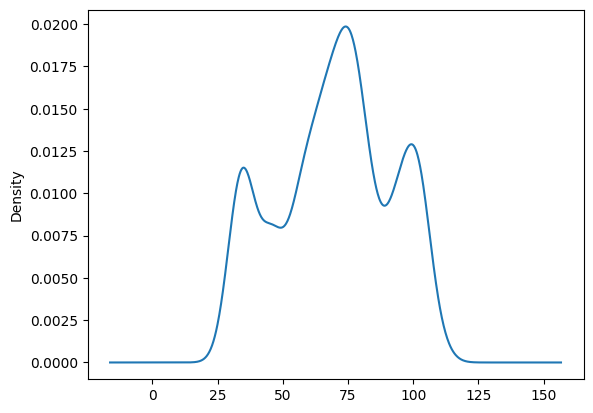

In [202]:
# Checking data distribution
closing_data = data_df['Close']
closing_data.plot(kind='kde')

### 4.1 Augmented Dickey-Fueller Test

In [203]:
# import statsmodels libraries and dependencies
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.2f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t {key}: {value:.2f}')
    print(f'Result: The data is {"not " if result[1] > 0.05 else ""}stationary')

adf_test(closing_data)

ADF Statistic: -0.76
p-value: 0.83
Critical Values:
	 1%: -3.43
	 5%: -2.86
	 10%: -2.57
Result: The data is not stationary


## 4.2 KPSS Test

In [204]:
from statsmodels.tsa.stattools import kpss
def kpss_test(data):
    result = kpss(data, regression='ct')
    print(f'KPSS Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.2f}')
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.2f}')
    print(f'Result: The data is {"not " if result[1] < 0.05 else ""}stationary')

kpss_test(closing_data)

KPSS Statistic: 1.20
p-value: 0.01
Critical Values:
	10%: 0.12
	5%: 0.15
	2.5%: 0.18
	1%: 0.22
Result: The data is not stationary


In [205]:
closing_data = data_df.loc[:,['Date', 'Close']]
# reverse the order of the dataframe
closing_data = closing_data.iloc[::-1]
closing_data.set_index('Date', inplace=True)
closing_data.asfreq('D')

,Close
Date,
2010-01-04,32.98
2010-01-05,32.85
2010-01-06,32.56
2010-01-07,33.76
2010-01-08,34.00
...,...
2023-11-06,71.08
2023-11-07,70.25
2023-11-08,68.75


In [206]:
# make a for loop to count the shape of the dataframe for each year
shape_list = []
for year in range(2010, 2023):
    shape_list.append(closing_data.loc[f'{year}-01-01':f'{year}-12-31'].shape[0])

## 4.3 Seasonality Graph

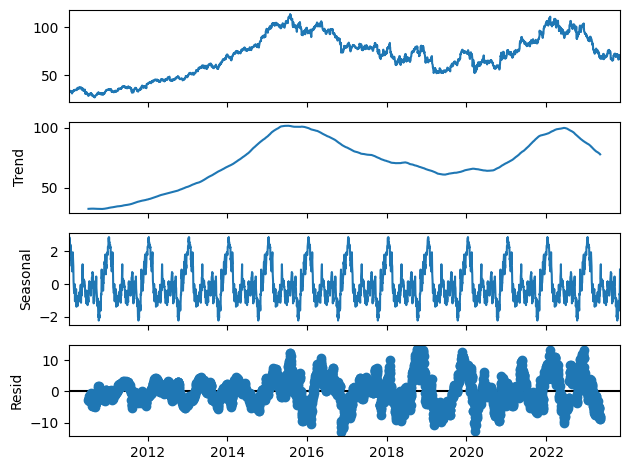

In [207]:
# Checking seasonality of the stock
res = seasonal_decompose(closing_data, model='additive', period=252)

trend = res.trend
seasonal = res.seasonal
residual = res.resid

resplot = res.plot()

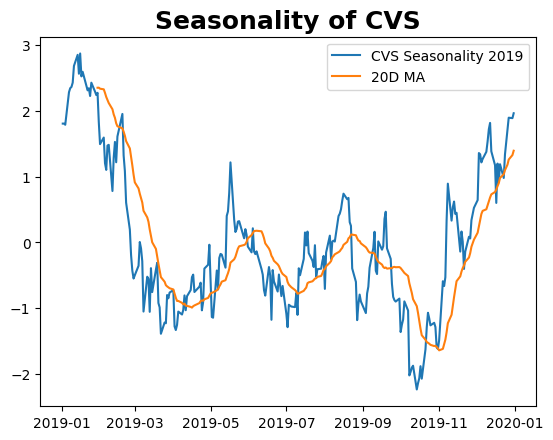

In [208]:
import matplotlib.pyplot as plt

# Plotting seasonality agains 20 days moving average
year_int = 2019
stock_seasonality=res.seasonal[res.seasonal.index.year == year_int]
MA20=stock_seasonality.rolling(window=20).mean()
plt.plot(stock_seasonality, label=f'{symbol} Seasonality {year_int}')
plt.plot(MA20, label='20D MA')
plt.title(f"Seasonality of {symbol}", fontsize=18, fontweight='bold')
plt.legend()
plt.show()

# plot using altair
# stock_seasonality = stock_seasonality.reset_index()
# stock_seasonality.columns = ['Date', 'Seasonality']
# stock_seasonality['Date'] = stock_seasonality['Date'].astype(str)

# Stock_Seasonality_chart = alt.Chart(stock_seasonality).mark_line().encode(
#     x='Date',
#     y='Seasonality'
# ).properties(
#     width=1500,
#     height=400
# )

# MA20 = MA20.reset_index()
# MA20.columns = ['Date', 'MA20']
# MA20['Date'] = MA20['Date'].astype(str)

# # make MA20_chart with red color
# MA20_chart = alt.Chart(MA20).mark_line(color='red').encode(
#     x='Date',
#     y='MA20'
# )

# Stock_Seasonality_chart + MA20_chart



In [209]:
closing_data

,Close
Date,
2010-01-04,32.98
2010-01-05,32.85
2010-01-06,32.56
2010-01-07,33.76
2010-01-08,34.00
...,...
2023-11-06,71.08
2023-11-07,70.25
2023-11-08,68.75


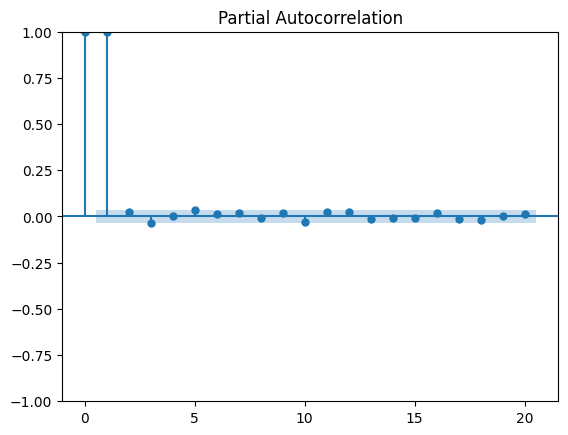

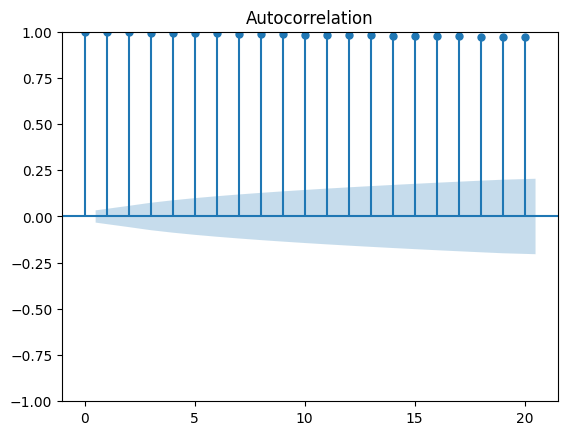

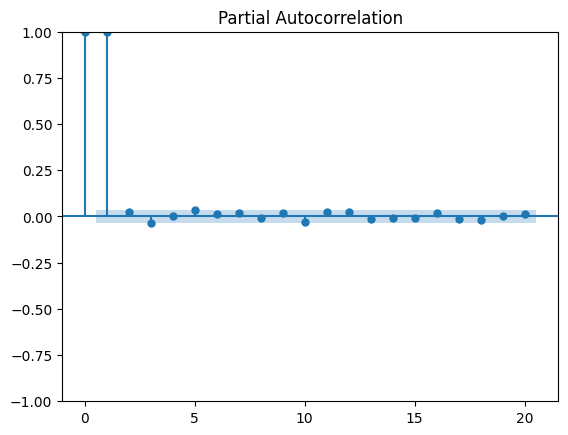

In [210]:
# Autocorrelation check
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(closing_data, lags=20)
plot_pacf(closing_data, lags=20)


# 5. Making the Data Stationary

## 5.1 Using Difference

Text(0.5, 1.0, 'Differenced Closing Price')

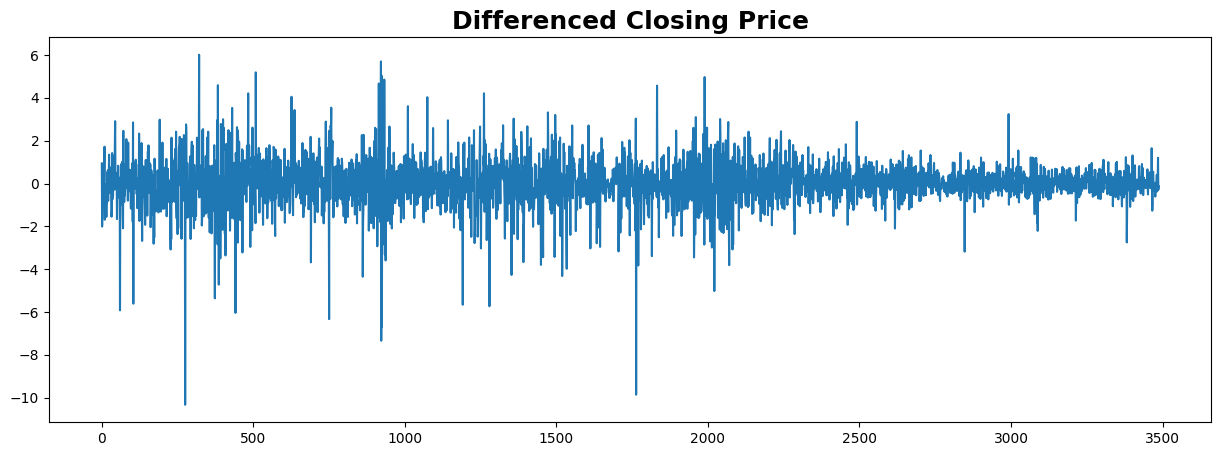

In [211]:
# use differencing to make the data stationary
closing_data_diff = data_df.loc[:,['Close']]
closing_data_diff = closing_data_diff.iloc[::-1]
closing_data_diff = closing_data_diff.astype(float)
closing_data_diff = closing_data_diff.diff().dropna()
closing_data_diff.columns = ['Close_diff']

# plot the differenced data
plt.figure(figsize=(15,5))
plt.plot(closing_data_diff)
plt.title('Differenced Closing Price', fontsize=18, fontweight='bold')

In [212]:
# do the ADF test again
adf_test(closing_data_diff['Close_diff'])

ADF Statistic: -19.13
p-value: 0.00
Critical Values:
	 1%: -3.43
	 5%: -2.86
	 10%: -2.57
Result: The data is stationary


In [213]:
# do the KPSS test again
kpss_test(closing_data_diff['Close_diff'])

KPSS Statistic: 0.07
p-value: 0.10
Critical Values:
	10%: 0.12
	5%: 0.15
	2.5%: 0.18
	1%: 0.22
Result: The data is stationary


## 5.2 Using Log Rule

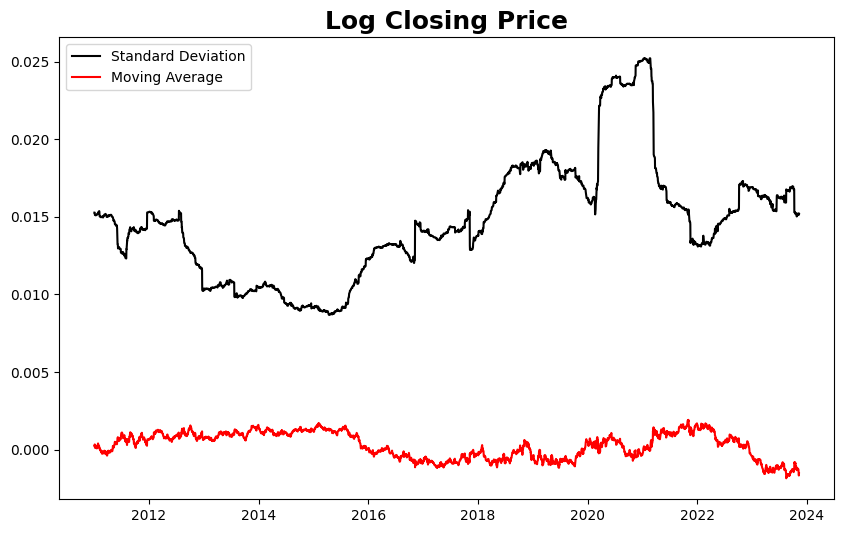

In [214]:
# make date as index in closing_data_diff
closing_data_new = data_df.loc[:,['Date', 'Close']]
closing_data_new = closing_data_new.iloc[::-1]
closing_data_new.set_index('Date', inplace=True)

df_log = np.log(closing_data_new)
df_log_diff = df_log.diff().dropna()
moving_avg = df_log_diff.rolling(252).mean()
std_dev = df_log_diff.rolling(252).std()

# plot them
plt.figure(figsize=(10, 6))
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_avg, color='red', label = 'Moving Average')
plt.title('Log Closing Price', fontsize=18, fontweight='bold')
plt.legend(loc='best')

plt.show()

# 6. ARIMA Model

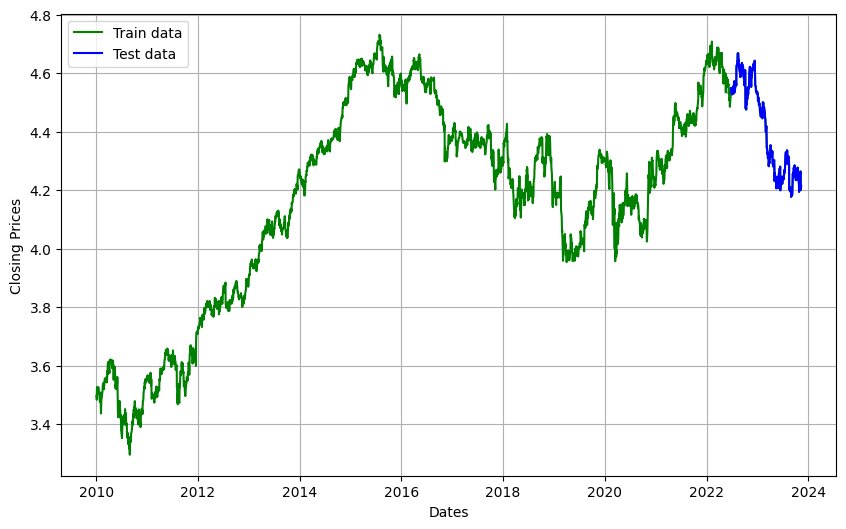

In [215]:
# split the data into train and test
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()


In [216]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17398.027, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17403.063, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17402.307, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17398.609, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17411.376, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-17409.392, Time=1.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17409.370, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17405.728, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-17407.380, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-17411.987, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17403.508, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-17410.009, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-17409.979, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17406.186, Time=0.37 sec
 ARIM

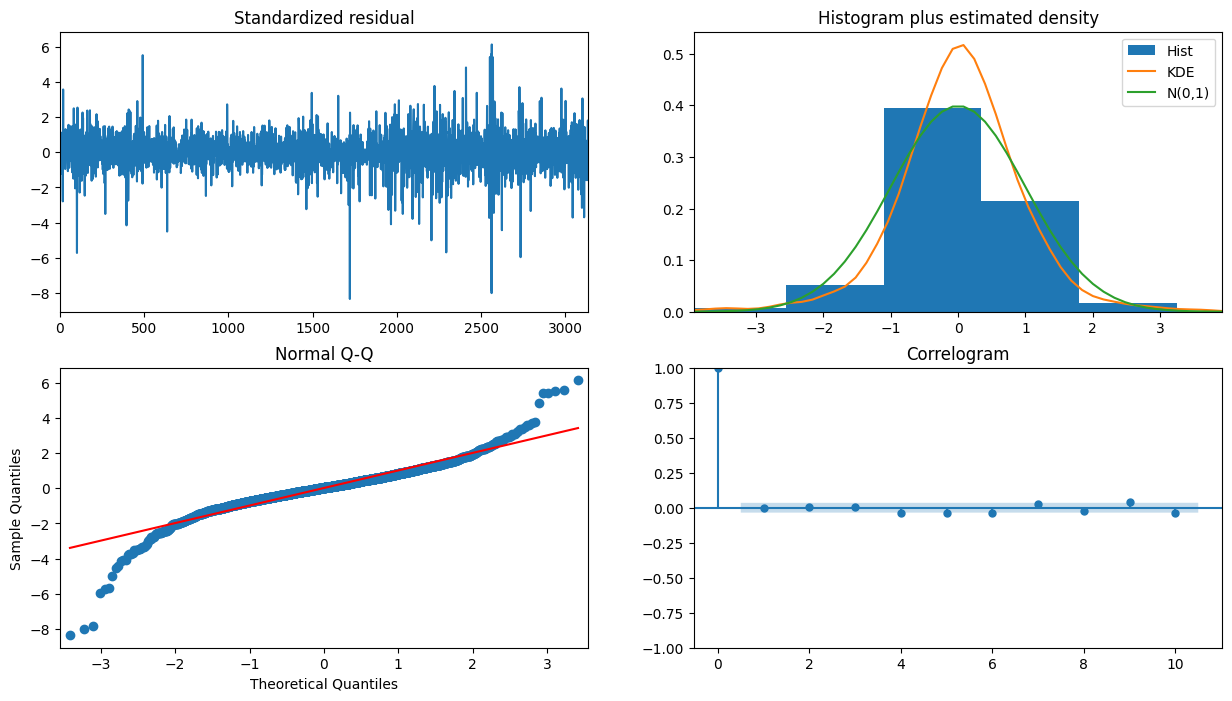

In [217]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [218]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3137
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8706.093
Date:                Sat, 11 Nov 2023   AIC                         -17406.186
Time:                        16:54:28   BIC                         -17388.034
Sample:                             0   HQIC                        -17399.672
                               - 3137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5080      0.182     -2.785      0.005      -0.865      -0.150
ma.L1          0.4636      0.188      2.471      0.013       0.096       0.831
sigma2         0.0002   2.75e-06     82.464      0.0

In [227]:
prediction = fitted.forecast(steps=len(test_data))

Text(0.5, 1.0, 'ARIMA Model Prediction')

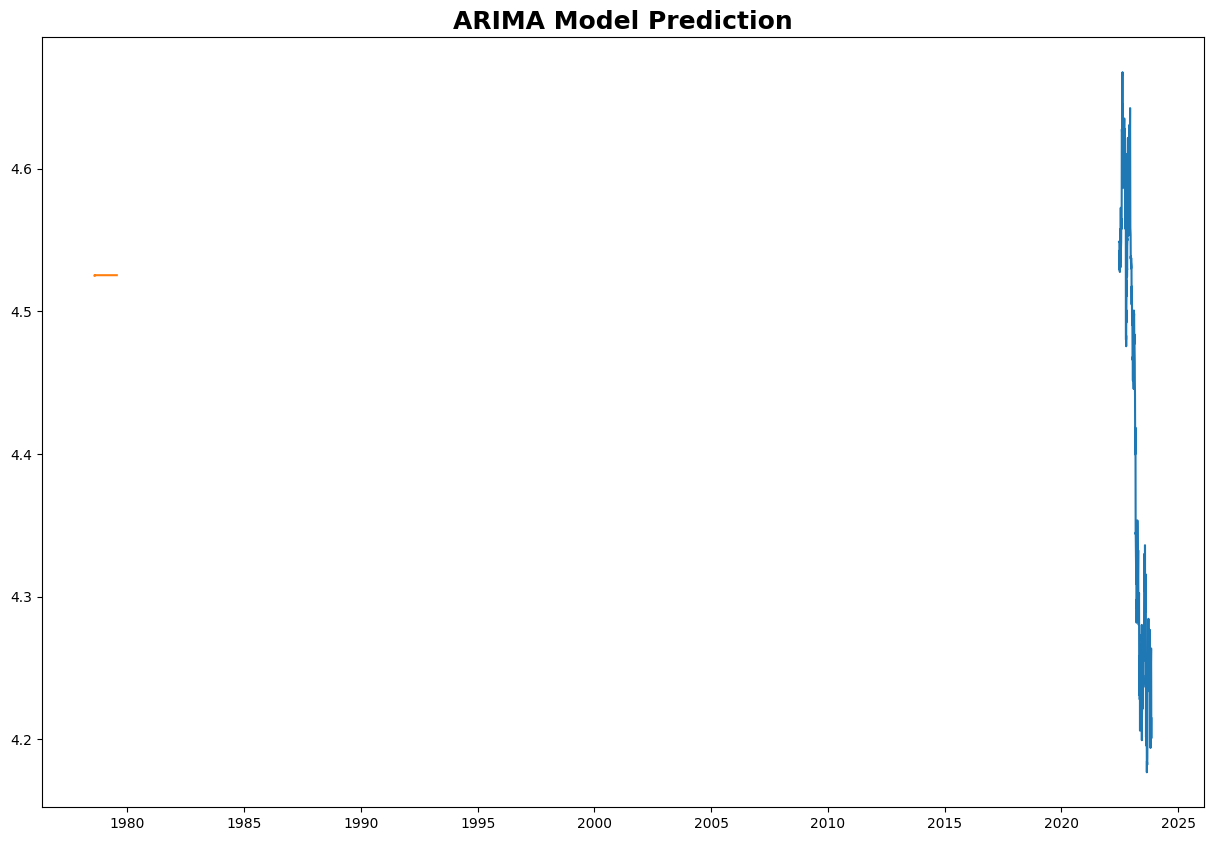

In [230]:
# create 

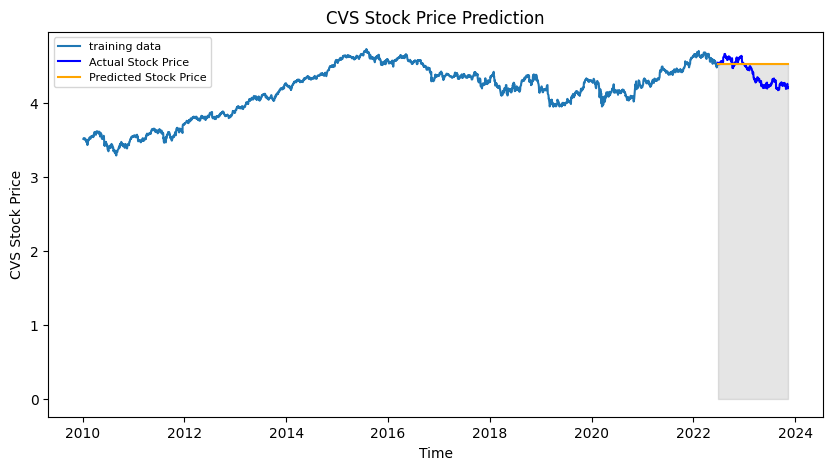

In [225]:
# Forecast on test data
fc, se, conf = fitted.forecast(steps=3, alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, 
                 color='k', alpha=.10)
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{symbol} Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()